In [5]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer

In [12]:
cancer = load_breast_cancer(as_frame=True)

In [13]:
df= cancer.frame
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [14]:
print("orignal Dataframe :",df.shape)

orignal Dataframe : (569, 31)


In [15]:
x = df[cancer['feature_names']]
print("Input DataFrame Shape :",x.shape)

Input DataFrame Shape : (569, 30)


In [17]:
print(cancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [21]:
x_mean = x.mean()
x_std = x.std()

# sandarization
Z = (x-x_mean)/x_std

In [26]:
c = Z.cov()
print("Covarience :",c.head())

Covarience :                  mean radius  mean texture  mean perimeter  mean area  \
mean radius         1.000000      0.323782        0.997855   0.987357   
mean texture        0.323782      1.000000        0.329533   0.321086   
mean perimeter      0.997855      0.329533        1.000000   0.986507   
mean area           0.987357      0.321086        0.986507   1.000000   
mean smoothness     0.170581     -0.023389        0.207278   0.177028   

                 mean smoothness  mean compactness  mean concavity  \
mean radius             0.170581          0.506124        0.676764   
mean texture           -0.023389          0.236702        0.302418   
mean perimeter          0.207278          0.556936        0.716136   
mean area               0.177028          0.498502        0.685983   
mean smoothness         1.000000          0.659123        0.521984   

                 mean concave points  mean symmetry  mean fractal dimension  \
mean radius                 0.822529       0.147

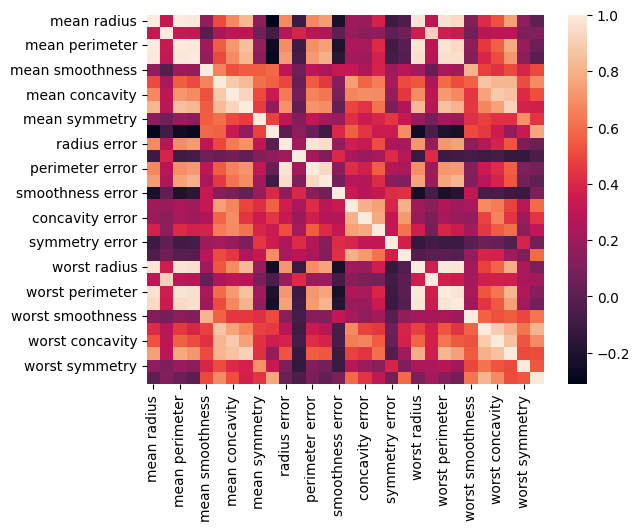

In [28]:
import seaborn as sns
sns.heatmap(c)
plt.show()

In [30]:
eigenvalue,eigenvector = np.linalg.eig(c)
print(eigenvalue)
print("Eigen Value :",eigenvalue.shape)
print("Eigen Vector :",eigenvector.shape)

[1.32816077e+01 5.69135461e+00 2.81794898e+00 1.98064047e+00
 1.64873055e+00 1.20735661e+00 6.75220114e-01 4.76617140e-01
 4.16894812e-01 3.50693457e-01 2.93915696e-01 2.61161370e-01
 2.41357496e-01 1.57009724e-01 9.41349650e-02 7.98628010e-02
 5.93990378e-02 5.26187835e-02 4.94775918e-02 1.33044823e-04
 7.48803097e-04 1.58933787e-03 6.90046388e-03 8.17763986e-03
 1.54812714e-02 1.80550070e-02 2.43408378e-02 2.74394025e-02
 3.11594025e-02 2.99728939e-02]
Eigen Value : (30,)
Eigen Vector : (30, 30)


In [39]:
index = eigenvalue.argsort()[::-1]
print(index)
eigenvalue = eigenvalue[index]

eigenvector = eigenvector[:,index]
eigenvector



[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


array([[ 2.18902444e-01, -2.33857132e-01, -8.53124284e-03,
         4.14089623e-02, -3.77863538e-02,  1.87407904e-02,
         1.24088340e-01,  7.45229622e-03, -2.23109764e-01,
         9.54864432e-02,  4.14714866e-02,  5.10674568e-02,
         1.19672116e-02, -5.95061348e-02,  5.11187749e-02,
        -1.50583883e-01,  2.02924255e-01,  1.46712338e-01,
        -2.25384659e-01, -7.02414091e-01,  2.11460455e-01,
        -2.11194013e-01, -1.31526670e-01,  1.29476396e-01,
         1.92264989e-02, -1.82579441e-01,  9.85526942e-02,
        -7.29289034e-02, -4.96986642e-02,  6.85700057e-02],
       [ 1.03724578e-01, -5.97060883e-02,  6.45499033e-02,
        -6.03050001e-01,  4.94688505e-02, -3.21788366e-02,
        -1.13995382e-02, -1.30674825e-01,  1.12699390e-01,
         2.40934066e-01, -3.02243402e-01,  2.54896423e-01,
         2.03461333e-01,  2.15600995e-02,  1.07922421e-01,
        -1.57841960e-01, -3.87061187e-02, -4.11029851e-02,
        -2.97886446e-02, -2.73661018e-04, -1.05339342e-

In [40]:
explained_var = np.cumsum(eigenvalue)/sum(eigenvalue)
explained_var

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

In [41]:
n_componenets = np.argmax(explained_var>=0.50)+1
n_componenets

2

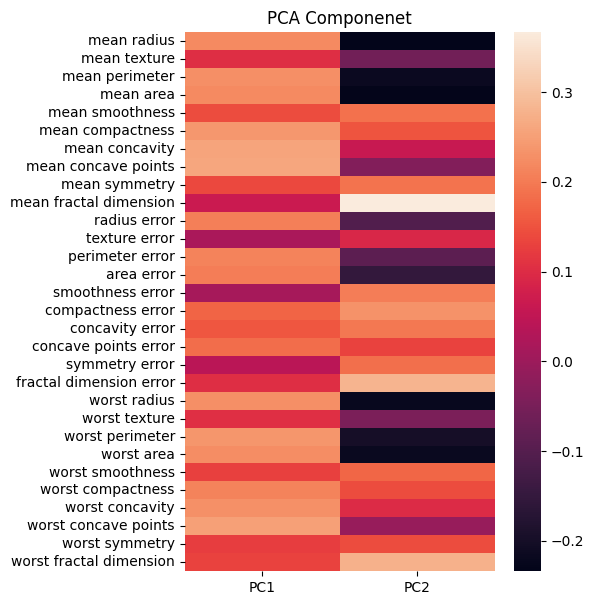

In [45]:
import pandas as pd
u= eigenvector[:,:n_componenets]
pca_componet = pd.DataFrame(u,index=cancer['feature_names'],
                            columns=['PC1','PC2']);

plt.figure(figsize=(5,7))
sns.heatmap(pca_componet)
plt.title("PCA Componenet")
plt.show()


In [49]:
Z_pca = Z @ pca_componet
# Rename the columns name
Z_pca.rename({'PC1': 'PCA1', 'PC2': 'PCA2'}, axis=1, inplace=True)
# Print the  Pricipal Component values
print(Z_pca)

          PCA1       PCA2
0     9.184755   1.946870
1     2.385703  -3.764859
2     5.728855  -1.074229
3     7.116691  10.266556
4     3.931842  -1.946359
..         ...        ...
564   6.433655  -3.573673
565   3.790048  -3.580897
566   1.255075  -1.900624
567  10.365673   1.670540
568  -5.470430  -0.670047

[569 rows x 2 columns]
